# Teil 11: Daten auswerten mit scipy 

## Bibliotheken importieren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Daten laden

Falls Sie Probleme mit den Daten laden haben, weil Python der Meinung ist, dass Sie Zeichenketten statt Zahlen in Ihrer Datei haben (z.B. Komma als Komma, statt Punkt), dann können Sie das Problem umgehen.  
Sie laden die Daten als Zeichenketten (Option `dtype = 'str'`), dannach tauschen Sie , gegen . mit `np.char.replace(data,',','.')` und das ganze speichern Sie als float mit `astype(float)`  

```python
data=np.loadtxt('data/Fremont_Bridge_Bicycle_Counter_weekly.csv', dtype='str', skiprows=1 )
data = np.char.replace(data,',','.').astype(float)
```

In [2]:
data1 = np.loadtxt('Daten/TempHumidityMessung1.txt', skiprows = 2) 
data1

array([[  1.  ,  27.86,  24.08],
       [  2.  ,  27.85,  24.08],
       [  3.  ,  27.85,  24.09],
       ...,
       [898.  ,  28.18,  23.75],
       [899.  ,  28.16,  23.73],
       [900.  ,  28.18,  23.75]])

In [3]:
data2 = np.loadtxt('Daten/TempHumidityMessung2.txt', skiprows = 2) 
data2

array([[  1.  ,  67.35,  23.35],
       [  2.  ,  67.35,  23.36],
       [  3.  ,  68.22,  23.37],
       ...,
       [898.  ,  87.8 ,  32.06],
       [899.  ,  87.8 ,  32.04],
       [900.  ,  87.8 ,  32.06]])

In [4]:
data1[:, 0] *= 0.2
data2[:, 0] *= 0.2

In [5]:
t1 = data1[:, 0]
rH1 = data1[:, 1]
temp1 = data1[:, 2]

In [6]:
t2 = data2[:, 0]
rH2 = data2[:, 1]
temp2 = data2[:, 2]

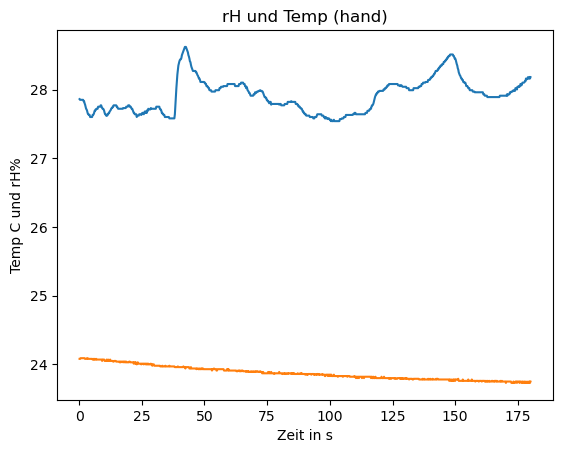

In [7]:
plt.plot(t1, rH1, label = "rH")
plt.plot(t1, temp1, label = "Temp")
plt.xlabel("Zeit in s")
plt.ylabel("Temp C und rH%")
plt.title("rH und Temp (hand)")
plt.legend
plt.show()

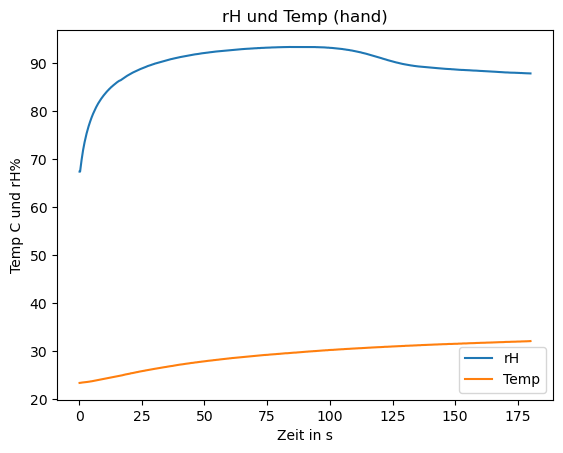

In [8]:
plt.plot(t2, rH2, label = "rH")
plt.plot(t2, temp2, label = "Temp")
plt.xlabel("Zeit in s")
plt.ylabel("Temp C und rH%")
plt.title("rH und Temp (hand)")
plt.legend()
plt.show()

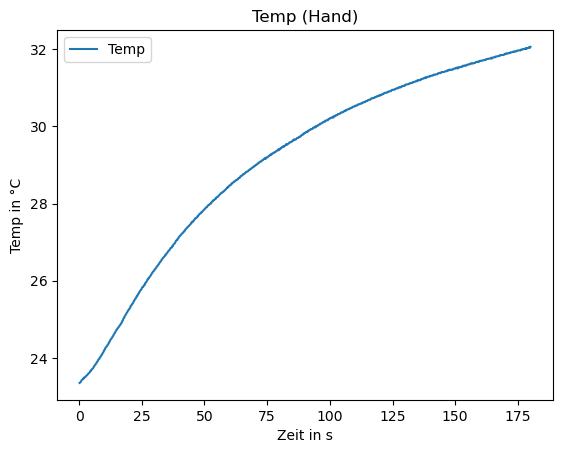

In [9]:
plt.plot(t2, temp2, label = "Temp")
plt.xlabel("Zeit in s")
plt.ylabel("Temp in °C")
plt.title("Temp (Hand)")
plt.legend()
plt.show()

In [10]:
temp1 -= data1[0,2]
temp2 -= data2[0,2]

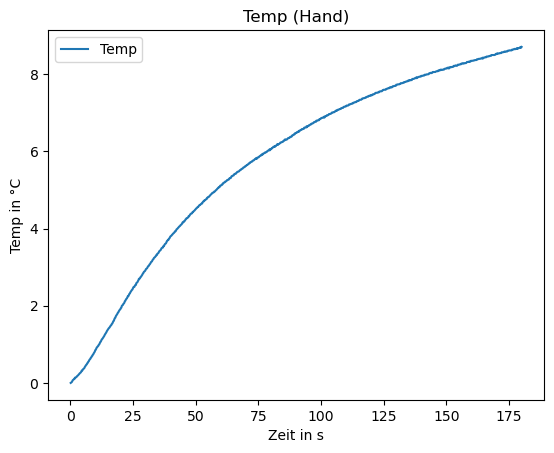

In [11]:
plt.plot(t2, temp2, label = "Temp")
plt.xlabel("Zeit in s")
plt.ylabel("Temp in °C")
plt.title("Temp (Hand)")
plt.legend()
plt.show()

In [39]:
def temp(t, tau, dt):
    return dt*(1 - np.exp(-t/tau))

In [56]:
tau0 = 80
dt0 = 9.8

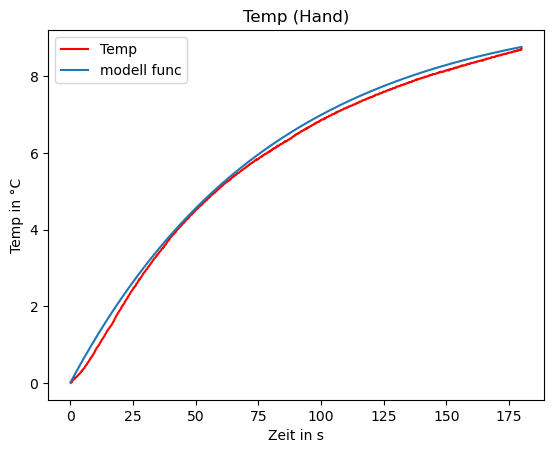

In [58]:
plt.plot(t2, temp2, 'r',label = "Temp")
plt.xlabel("Zeit in s")
plt.ylabel("Temp in °C")
plt.title("Temp (Hand)")

plt.plot(t1, temp(t1, tau0, dt0), label = "modell func")

plt.legend()
plt.show()

## Fit-Funktion definieren

Um eine Funktion an die Daten anzupassen, müssen wir sie erst definieren. In den Argmenten der Funktion muss erst die unabhängige Variable stehen, und weiter die Parameter, die optimiert werden sollen. 

Welche Funktion wir anpassen können, hängt vom theoretischen Modell ab. 

## Funktions-Fit mit Scipy

Um Kurven zu Daten anzupassen, bedienen wir uns aus einer weiteren mächtigen Python-Bibliothek, genannt `Scipy`. Diese Bibliothek ist für wissenschaftliche Zwecke sehr gut geeignet. Wir brauchen aus ihrem Modul `optimize` die Methode `curve_fit`, die wir zuerst importieren müssen: 

In [12]:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=None,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    nan_policy=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None

Mit `curve_fit?` schauen wir an, welche Argumente gebraucht werden: 
1. die `f` Fit-Funktion (hier: unsere Sinusoide. WICHTIG! in der Funktion steht die unabhängige Variable als erstes Argument!), 
2. `xdata` (hier: Zeit, erste Spalte von data), 
3. `ydata` (Daten zum Anpassen, z.B. zweite oder dritte Spalten von data). Beide letzten müssen die gleiche Länge haben.
4. `p0`, Anfangsparamter. Es ist ratsam `sinvolle Anfangsparamter` zu geben, sonst startet die `curve_fit`-Funktion mit 1, was manchmal zu unsinngen Ergebnissen oder gar keinem Fit führen kann.
5. weitere Parameter

und welche Größen `curve_fit` ausgibt:
1. `popt` optimal angepasste Parameter in der Reihnfolge, wie sie in der Fit-Funktion definiert wurden,
2. `pcov` Kovarianz-Matrix, aus der man die Standardabweichung der Paramtern holen kann: `np.sqrt(np.diag(pcov))`

### Daten und Fit plotten

Die angepassen Parameter übergeben wir der Fit-Funktion in der Form `fit_funktion(xdata, *poptS)`. `*` vor `poptS` entpackt die optimalen Argumente der Fit-Funktion, die `curve_fit` gefunden hat.

> <font color='blue'> **Hinweis**</font> 
>
>Damit man den gesuchten Parameter (z.B. `poptS[1]`) bereits in der Grafik erkennt, schreiben wir ihn und seine Standardabweichung `perrS[1]` in die Legende.
Da beide Zahlen sehr lang sind, und es kein Sinn hat, eine Standardabweichung mit mehr als 2 signifikanten Stellen anzugeben, schneiden wir die Zahlen nach 4 bzw. 2 signifikanten Stellen ab mit Hilfe von `'%.4g' %` und `'%.2g' %` (Standardabweichung mit zwei signifikanten Stellen und die gleiche Genauigkeit für das Parameter: in unserem Fall sind das 4 signifikante Stellen). 
Um `poptS[1]` und `perrS[1]` in die Legende zu packen, müssen wir sie in strings konvertieren und zu den restlichen strings addieren:  
>
>`label='Fit, Parameter=' + str('%.4g' % poptS[1])+'$\pm$'+str('%.2g' % perrS[1])+'Einheit'`
>
>Übrigens, Bild-Legenden verstehen Latex. Daher könnten wir`$\pm$` verwenden, um ein Plus/Minus-Zeichen zu schreiben. 